# <b> Chapter 7

Support material:

https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/11b300b528689cba71f91588d6248143_MIT18_05S14_Reading17b.pdf

In [202]:
from statistics import NormalDist
from typing import Tuple, List
from math import factorial, sqrt
import matplotlib.pyplot as plt
import statistics
import math

## Statistical Hypothesis Testing

### ⭐ Example:

<h3> Consider that: <br>
   <ol> 
   <li> The probability of a coin landing heads is <i>p</i> 
   <li> The number of heads resulting from <i>n</i> flips is <i>X</i>
   </ol>
</h3>

**Null hypothesis:** <br><br>
$
H_0: p = \frac{1}{2}
$

**Alternative hypothesis:** <br><br>
$
H_1: p \neq \frac{1}{2}
$
<br><br>

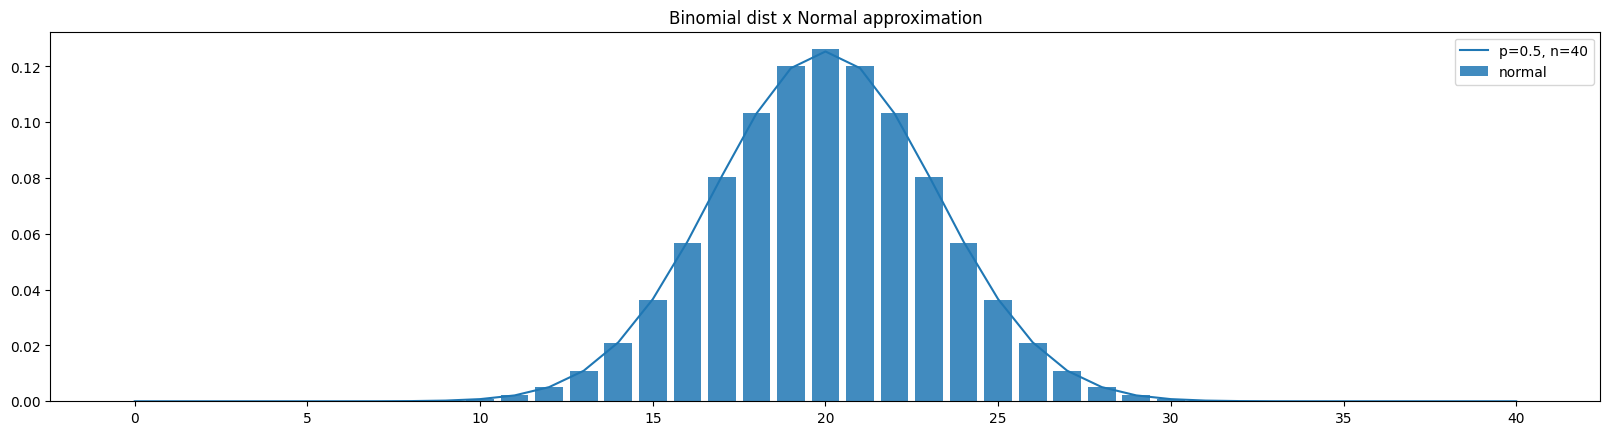

In [203]:
# Calculating the probability of acceptance of H0 along with the rejection region and plotting the Binomial Distribution graph


def binomial_dist(p: float, n: int) -> List[float]:
    """Calculates and returns the PMF of a number n of flips given a bias p."""
    bin_coef = lambda n, k: factorial(n) / (factorial(k) * factorial(n - k))
    return [bin_coef(n, k) * pow(p, k) * pow(1 - p, n - k) for k in range(n + 1)]


def normal_binomial_approx(n: int, p: float) -> Tuple[float, float]:
    """Calculates the mu and sigma that corresponds to a Binomial(n, p)"""
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    return mu, sigma


n = 40  # Sample large enough according to
p = 0.5  # Supposing H0
err = 0.05  # Significance
mu, sigma = normal_binomial_approx(n, p)
pdf = lambda x: NormalDist(mu, sigma).pdf(x)
cdf = lambda x: sum(binomial_dist(p, n)[: x + 1])
cdf_cc = lambda x: NormalDist(mu, sigma).cdf(x)

plt.figure().set_figwidth(20)
plt.plot(
    [x for x in range(n + 1)], binomial_dist(p, n), label=f"p={p}, n={n}", color="C0"
)
plt.bar(
    [x for x in range(n + 1)],
    [pdf(x) for x in range(n + 1)],
    label="normal",
    alpha=0.85,
)
plt.title("Binomial dist x Normal approximation")
plt.legend()
plt.show()

Suppose we got 15 heads out of these 40 throws, or $ P(X \leq 15) $. What can be said about the hypothesis?

In [204]:
print(f"CDF of P(X ≤ {15}) with and w/o Continuity Correction\n\nNo C.C: {cdf(15)}\nWith C.C: {cdf_cc(15.5)}")


CDF of P(X ≤ 15) with and w/o Continuity Correction

No C.C: 0.07692997208141605
With C.C: 0.0773644617426893


Its clear that in both scenarios $ P(X \leq 12) > 0.05 $, which means that we Fail to reject the null hypothesis.


## p-Values